## 1. BACKGROUND

1.1 Project Background

This project is made to fullfil the task given by Paques as qualification to role Data Sciencetist. In this project I will try to to Descriptive Analysis & Prescriptive Analysis.

The dataset used in this project is taken from Kaggle (https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset).

________

## 2. DISCLAIMER

2.1 Notebook Disclaimer


In this notebook, I will write the explanation of the code and its visualization, later then I write the code itself.

__________

## 3. IMPORT LIBRARY

3.1 Here I import all the libraries that I will use in this project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

______

## 4. DATA LOADING

4.1 Loading the Data
- Here I load the data, and showing the first five and last five of the data.

In [2]:
df = pd.read_csv('Video_Games_Sales_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


______

## 5. DATA CLEANING

5.1 Checking the shape of the data
- There are 16,719 rows and 16 colums in the dataset.

In [4]:
df.shape

(16719, 16)

5.2 Checking missing values
- There are several missing values in some columns as shown below.

In [5]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

5.3 Subset the columns
- Here I decided to drop the last 6 columns since some of the have missing value more than 50%, and some of them have almost 50% missing values.

In [6]:
df_clean = df[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Other_Sales', 'EU_Sales', 'NA_Sales', 'JP_Sales', 'Global_Sales']]
df_clean.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,EU_Sales,NA_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,8.45,28.96,41.36,3.77,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,0.77,3.58,29.08,6.81,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.29,12.76,15.68,3.79,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,2.95,10.93,15.61,3.28,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,1.00,8.89,11.27,10.22,31.37


5.4 Dropping Missing Values by Rows
- Here I drop the rows data that countain missing values, since the quantity is relatively small.

In [7]:
df_clean.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
Other_Sales          0
EU_Sales             0
NA_Sales             0
JP_Sales             0
Global_Sales         0
dtype: int64

5.5 Re-check Missing Value
- There is no missing value left in the dataset. 

In [8]:
df_clean.dropna(inplace=True)
df_clean.isnull().sum()

/var/folders/_d/0tjpkpcd0wg39zfsbnkxzgt40000gp/T/ipykernel_2719/2427178119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(inplace=True)


Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
Other_Sales        0
EU_Sales           0
NA_Sales           0
JP_Sales           0
Global_Sales       0
dtype: int64

5.6 Checking Current Data Shape and Data Type
- Now, we have 16,416 rows and 10 columns.
- The data type of the columns are object and float.

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   Other_Sales      16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   NA_Sales         16416 non-null  float64
 8   JP_Sales         16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


5.7 Converting Data Type
- Converting the Year of Release column from float to data of year only, so the data can be processed in optimal way.

In [10]:
df_clean['Year_of_Release'] = pd.to_datetime(df_clean['Year_of_Release'], format = '%Y').dt.date
df_clean['Year_of_Release'] = pd.DatetimeIndex(df_clean['Year_of_Release']).year

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  int64  
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   Other_Sales      16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   NA_Sales         16416 non-null  float64
 8   JP_Sales         16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


/var/folders/_d/0tjpkpcd0wg39zfsbnkxzgt40000gp/T/ipykernel_2719/3593520819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year_of_Release'] = pd.to_datetime(df_clean['Year_of_Release'], format = '%Y').dt.date
/var/folders/_d/0tjpkpcd0wg39zfsbnkxzgt40000gp/T/ipykernel_2719/3593520819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year_of_Release'] = pd.DatetimeIndex(df_clean['Year_of_Release']).year


5.8 Checking Our Clean Dat Frame

In [11]:
df_clean.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,EU_Sales,NA_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,8.45,28.96,41.36,3.77,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.77,3.58,29.08,6.81,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.29,12.76,15.68,3.79,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,2.95,10.93,15.61,3.28,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1.00,8.89,11.27,10.22,31.37


________

## 6. DESCRIPTIVE & PRESCRIPTIVE ANALYSIS

6.1 Describe Method
- There are some descriptive statistic from some numeric columns as shown below that generated from descbribe method.
- We can briefly know that the average of North America Sales is the highest rather than the Japan, Europe and Other average sales.
- This data information is span from 1980 to 2020.


In [12]:
df_clean.describe()

,Year_of_Release,Other_Sales,EU_Sales,NA_Sales,JP_Sales,Global_Sales
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000
mean,2006.489888,0.047670,0.146034,0.264129,0.078623,0.536708
std,5.881148,0.188156,0.507134,0.819028,0.311348,1.559885
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.010000,0.020000,0.080000,0.000000,0.170000
75%,2010.000000,0.030000,0.110000,0.240000,0.040000,0.470000
max,2020.000000,10.570000,28.960000,41.360000,10.220000,82.530000


6.2 Checking Quantity of non-Numerical Values

In [13]:
print('Total unique values in Name column are :', df_clean.Name.nunique())
print('Total unique values in Platform column are :', df_clean.Platform.nunique())
print('Total unique values in Genre column are :', df_clean.Genre.nunique())
print('Total unique values in Publisher column are :', df_clean.Publisher.nunique())

Total unique values in Name column are : 11397
Total unique values in Platform column are : 31
Total unique values in Genre column are : 12
Total unique values in Publisher column are : 580


6.3 Total Game based on Platform
- We can comprehend that DS and PS2 are the top 2 highest compared to others.

<AxesSubplot:xlabel='Platform', ylabel='counts'>

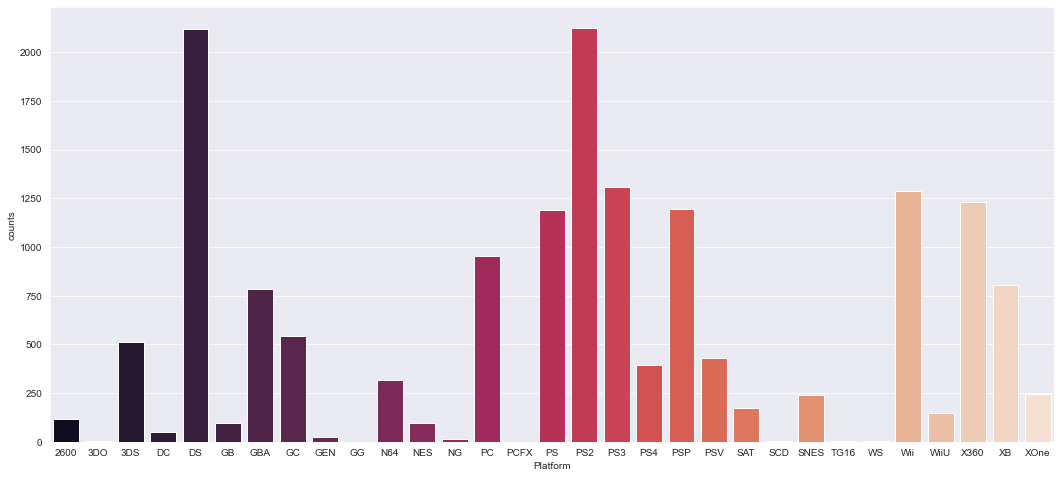

In [14]:
df_platform = df_clean.groupby('Platform').size().reset_index(name='counts')

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(data=df_platform, x='Platform', y='counts', palette='rocket')

In [43]:
df_platform_2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,EU_Sales,NA_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,8.45,28.96,41.36,3.77,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.77,3.58,29.08,6.81,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.29,12.76,15.68,3.79,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,2.95,10.93,15.61,3.28,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1.00,8.89,11.27,10.22,31.37
...,...,...,...,...,...,...,...,...,...,...
16315,Monster High: New Ghoul in School,Wii,2015,Action,Little Orbit,0.00,0.01,0.00,0.00,0.01
16385,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.00,0.01,0.01
16398,Surf's Up,GC,2007,Sports,Ubisoft,0.00,0.00,0.01,0.00,0.01
16487,Petz: Hamsterz Life 2,GBA,2007,Misc,Ubisoft,0.00,0.00,0.01,0.00,0.01


6.4 Total Game based on Genre
- Accross platform, the most released game is action genre video game. Followed with Sports game and Misc game.
- The least released game genre are Puzzle, Strategy, & Simulation. The reason why these genres of game very segmented is perhaps because the genres & respective games are somehow hard to play compared to others genres, taking more consentration and need more focus.
- The contraty, the reason action & sports have the highest number of games released is, because they are easy-playing games.

<AxesSubplot:xlabel='Genre', ylabel='counts'>

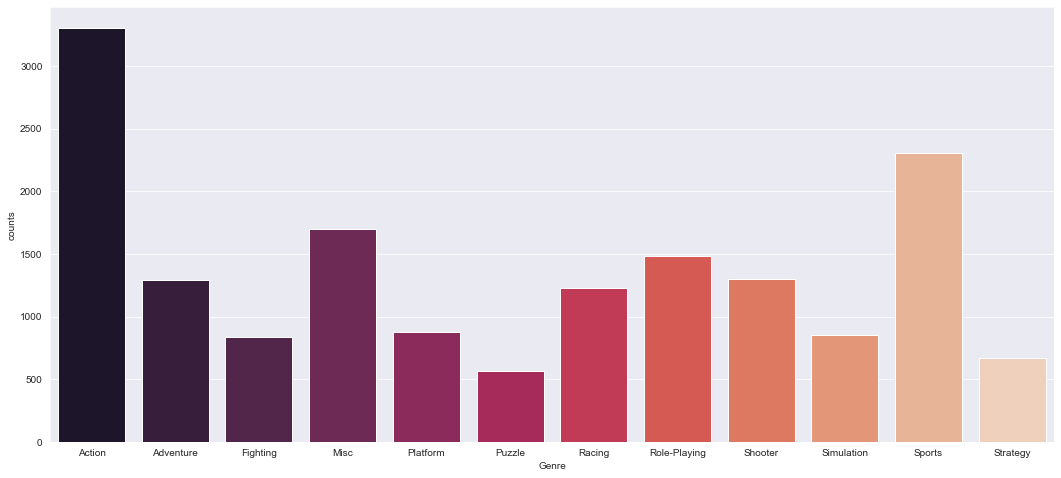

In [15]:
df_platform = df_clean.groupby(by='Genre').size().reset_index(name='counts')

sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(data=df_platform, x='Genre', y='counts', palette='rocket')

6.5 Game Released by Year
- From the plot below, it shows that 2008 & 2009 have the highest game released. Later then, it's decreasing until 2013, then increasing a bit in 2014 & 2015, but decreasing again in 2016.


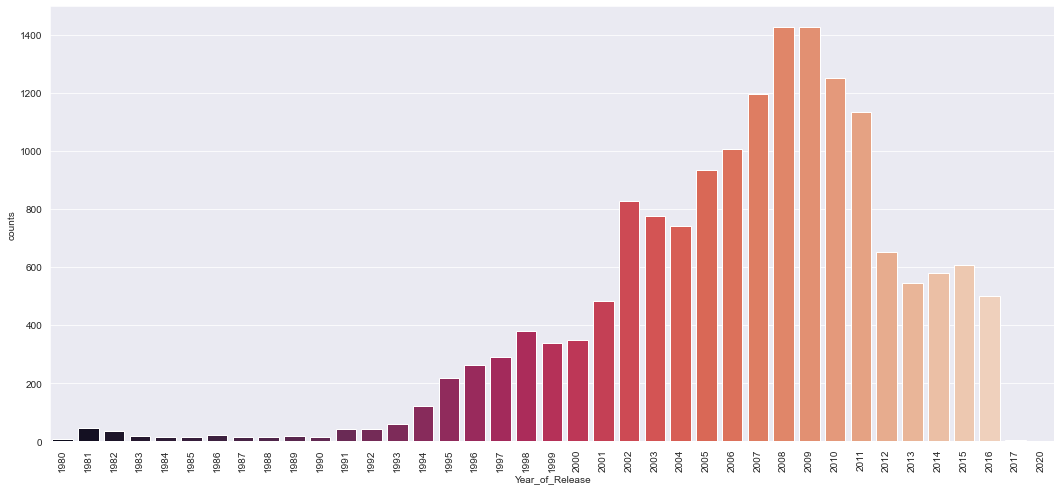

In [16]:
df_year = df_clean.groupby(by='Year_of_Release').size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(18,8))
sns.barplot(data=df_year, x='Year_of_Release', y='counts', palette='rocket')
ax.tick_params(axis='x', labelrotation = 90)

6.6 Highest & Lowest Global Sales
- There are Wii Sports, Super Mario Bros and Mario Kart Wii in the top 3 highest Global Sales.
- Adventure Time, Football Manager 2055, Winning Post 8 2016 have the lowest global sales.

In [17]:
df_clean.sort_values('Global_Sales', ascending=False)

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,EU_Sales,NA_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,8.45,28.96,41.36,3.77,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.77,3.58,29.08,6.81,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.29,12.76,15.68,3.79,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,2.95,10.93,15.61,3.28,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1.00,8.89,11.27,10.22,31.37
...,...,...,...,...,...,...,...,...,...,...
16294,Simple 2000 Series Vol. 120: The Saigo no Nipp...,PS2,2007,Strategy,D3Publisher,0.00,0.00,0.00,0.01,0.01
16295,Casper,GBA,2002,Adventure,Microids,0.00,0.00,0.01,0.00,0.01
16297,Adventure Time: The Secret of the Nameless,X360,2014,Adventure,Little Orbit,0.00,0.00,0.01,0.00,0.01
16298,Football Manager 2005,PC,2004,Sports,Sega,0.00,0.01,0.00,0.00,0.01


6.7 Highest & Lowest NA Sales
- The top 2 in NA Sales are the same with top 2 in Global Sales, they are Wii Sports & Super Mario Bros. In the 3th place is Duck Hunt with 26.93 millions.
- After having the lowest global sales, Winning Post 8 2016 also has lowest sales in North America.

In [18]:
df_clean.sort_values('NA_Sales', ascending=False)

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,EU_Sales,NA_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,8.45,28.96,41.36,3.77,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.77,3.58,29.08,6.81,40.24
9,Duck Hunt,NES,1984,Shooter,Nintendo,0.47,0.63,26.93,0.28,28.31
5,Tetris,GB,1989,Puzzle,Nintendo,0.58,2.26,23.20,4.22,30.26
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.29,12.76,15.68,3.79,35.52
...,...,...,...,...,...,...,...,...,...,...
11715,Quo Vadis,SAT,1995,Strategy,Glams,0.00,0.00,0.00,0.08,0.08
11714,Need For Speed: Undercover,PC,2008,Racing,Electronic Arts,0.01,0.07,0.00,0.00,0.08
11711,Sumikko Gurashi: Mura o Tsukurundesu,3DS,2016,Misc,Nippon Columbia,0.00,0.00,0.00,0.08,0.08
11709,Dragon Force II: Kamisarishi Daichi ni,SAT,1998,Strategy,Sega,0.00,0.00,0.00,0.08,0.08


6.8 Highest & Lowest Japan Sales
- There is Super Mario Bros in the 3 top sales in Japan sales as well.
- Here there is different charateristic that Pokemon-related games have secure the top 2 highest sales in Japan. It's perhaps the Pokemon Franchise cartoon is very popular there.
- Now, we see the total different games in the 3 lowest sales in Japan; X-Men:Next Dimension, Dynasty Warriors 5, 4x4 EVO 2.

In [19]:
df_clean.sort_values('JP_Sales', ascending=False)

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,EU_Sales,NA_Sales,JP_Sales,Global_Sales
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1.00,8.89,11.27,10.22,31.37
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,0.71,6.18,9.00,7.20,23.10
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.77,3.58,29.08,6.81,40.24
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,2.88,9.14,11.28,6.50,29.80
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,1.36,4.46,6.38,6.04,18.25
...,...,...,...,...,...,...,...,...,...,...
9606,Drome Racers,PS2,2002,Racing,Electronic Arts,0.02,0.05,0.06,0.00,0.13
4900,Alpha Protocol,X360,2010,Role-Playing,Sega,0.04,0.12,0.23,0.00,0.39
9608,X-Men: Next Dimension,GC,2002,Fighting,Activision,0.00,0.03,0.10,0.00,0.13
9609,Dynasty Warriors 5 Empires,X360,2006,Action,Tecmo Koei,0.01,0.01,0.11,0.00,0.13


6.9 Highest & Lowest EU Sales
- Wii Sports & Mario Kart Wii again secure the top 5 highest sales, now in EU. 
- Winning Post 2018 has the lowest sales too in Europe, after their failure in Global and North America market.

In [20]:
df_clean.sort_values('EU_Sales', ascending=False)

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,EU_Sales,NA_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,8.45,28.96,41.36,3.77,82.53
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.29,12.76,15.68,3.79,35.52
10,Nintendogs,DS,2005,Simulation,Nintendo,2.74,10.95,9.05,1.93,24.67
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,2.95,10.93,15.61,3.28,32.77
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,2.04,9.20,4.74,4.16,20.15
...,...,...,...,...,...,...,...,...,...,...
10688,Idol Janshi Suchie-Pai Remix,SAT,1995,Misc,Jaleco,0.00,0.00,0.00,0.10,0.10
10686,"Sakura Wars 2: Kimi, Shinitamou koto Nakare",DC,2000,Adventure,Sega,0.00,0.00,0.00,0.10,0.10
10684,Contact,DS,2006,Role-Playing,Rising Star Games,0.01,0.00,0.07,0.03,0.10
10680,SCORE International Baja 1000: The Official Game,Wii,2008,Racing,Activision,0.01,0.00,0.09,0.00,0.10


6.9 Highest & Lowest Other Region Sales
- In other region sales we can spot again Wii Sports & Mario Kart Wii place in top 5 highest sales.
- However, Grand Theft Auto series have secure the top sales in this region and also secure the top 4 market.
- With Winning Post 8 failure in other region, it marks their failure in 4 different markets so far.

In [21]:
df_clean.sort_values('Other_Sales', ascending=False)

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,EU_Sales,NA_Sales,JP_Sales,Global_Sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,10.57,0.40,9.43,0.41,20.81
0,Wii Sports,Wii,2006,Sports,Nintendo,8.45,28.96,41.36,3.77,82.53
48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,7.53,0.01,3.01,1.10,11.66
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,3.96,9.09,7.02,0.98,21.04
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.29,12.76,15.68,3.79,35.52
...,...,...,...,...,...,...,...,...,...,...
11822,Hero Bank,3DS,2014,Role-Playing,Sega,0.00,0.00,0.00,0.07,0.07
11817,Summon Night 4,PSP,2012,Role-Playing,Namco Bandai Games,0.00,0.00,0.00,0.07,0.07
11816,Soccer Tsuku: Pro Soccer Club o Tsukurou!,PSV,2013,Sports,Sega,0.00,0.00,0.00,0.07,0.07
11815,Again,DS,2009,Adventure,Ackkstudios,0.00,0.00,0.07,0.00,0.07


## EXTRACTING INSIGHT FROM PS2 & DS

- Since PS2 and DS significantly have highest games, in this session I will try to look further the data distribution.
- There are 2100s game entries from both Platforms.

In [22]:
df_ps2 = df_clean[df_clean['Platform'] == 'PS2']
df_ds = df_clean[df_clean['Platform'] == 'DS']
print('Total PS2 game entries are :', len(df_ds))
print('Total PS2 game entries are :', len(df_ps2))

df_ds.head()

Total PS2 game entries are : 2122
Total PS2 game entries are : 2127


,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,EU_Sales,NA_Sales,JP_Sales,Global_Sales
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,2.88,9.14,11.28,6.50,29.80
10,Nintendogs,DS,2005,Simulation,Nintendo,2.74,10.95,9.05,1.93,24.67
11,Mario Kart DS,DS,2005,Racing,Nintendo,1.90,7.47,9.71,4.13,23.21
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,2.04,9.20,4.74,4.16,20.15
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,1.36,4.46,6.38,6.04,18.25


6.10 Game Release based on Platform (DS & PS2)
- From the graph below we can conclude that both platform release many games during their life span. It's increasing in the beginning the later decreasing.
- This is a normal thing, since usually the game console have new generation and type, so the game support will be stopped, and new development will be focused on the next generation console.
- PS2 have their more than 200 games from 2002 until 2007, and for DS 2006 until 2010. Even for DS have its peak in 2008 with more than 400 games.
- There's something strange in the DS graph, that it has year 1985, when it's released in 2004 for th first time. Maybe it's error when inputting data, so we need to delete it. 

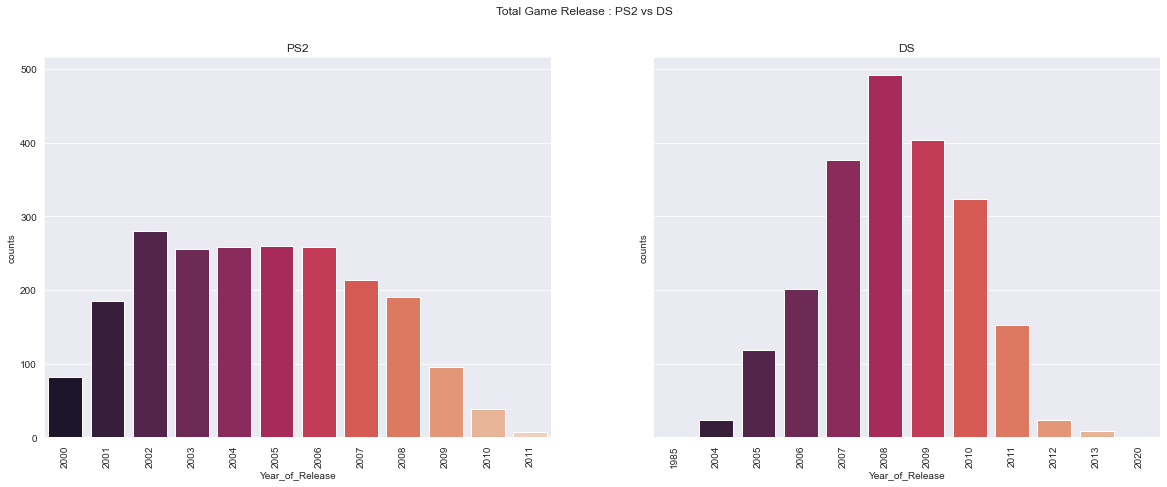

In [23]:
ps2_group_year = df_ps2.groupby(by='Year_of_Release').size().reset_index(name='counts')
ds_group_year = df_ds.groupby(by='Year_of_Release').size().reset_index(name='counts')

fig, ax = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
sns.barplot(data=ps2_group_year, x='Year_of_Release', y='counts', palette='rocket', ax=ax[0])
sns.barplot(data=ds_group_year, x='Year_of_Release', y='counts', palette='rocket', ax=ax[1])
fig.suptitle('Total Game Release : PS2 vs DS')
ax[0].set_title('PS2')
ax[1].set_title('DS')
ax[0].tick_params(axis='x', labelrotation = 90)
ax[1].tick_params(axis='x', labelrotation = 90)

6.11 PS2 & DS' Global Sales
- Both PS2 & DS almost have the same trends in sales, eventhough PS2 have more in amount.
- This is because PS2 is rival os DS. Nintendo, the competitor of Playstation (PS2 maker) made DS to compete with PS2 markets.
- Both have decreasing in sales since of them have new console generation. Playstation have PS2 and Nintendo have 3DS.
- So, with that change the sales will decrease, until the support for respective console is stopped.

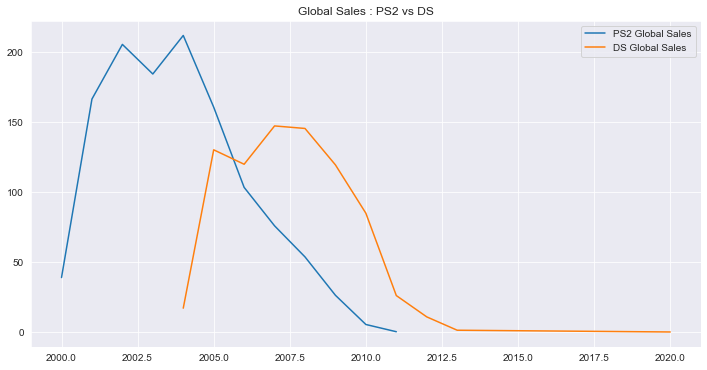

In [24]:
# deleting the data that below 20046.
df_ds = df_ds[df_ds['Year_of_Release'] >= 2004]

ps2_group_year = df_ps2.groupby(by='Year_of_Release', as_index=False)[['Year_of_Release','Global_Sales']].agg({'Global_Sales':'sum'})
ds_group_year = df_ds.groupby(by='Year_of_Release', as_index=False)[['Year_of_Release','Global_Sales']].agg({'Global_Sales':'sum'})

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(ps2_group_year.Year_of_Release, ps2_group_year.Global_Sales, label='PS2 Global Sales')
plt.plot(ds_group_year.Year_of_Release, ds_group_year.Global_Sales, label='DS Global Sales')
plt.title('Global Sales : PS2 vs DS')
plt.legend()
plt.show()

____

## 7. PRESCRIPTIVE ANALYSIS USING TIME SERIES

In [25]:
df_clean.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Other_Sales,EU_Sales,NA_Sales,JP_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,8.45,28.96,41.36,3.77,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.77,3.58,29.08,6.81,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.29,12.76,15.68,3.79,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,2.95,10.93,15.61,3.28,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1.00,8.89,11.27,10.22,31.37


7.1 Selecting Data
- The more data used in time series is better, so here I decide to select the data based on Publisher so the data span from the minimal until maximum of the years.
- Nintendo is one of multinational video game companies and they have successed become one if the greatest company in game development, so in this series we use data from Nintendo.
- In this plot, we can see how is the sales of Nintendo made over the years.

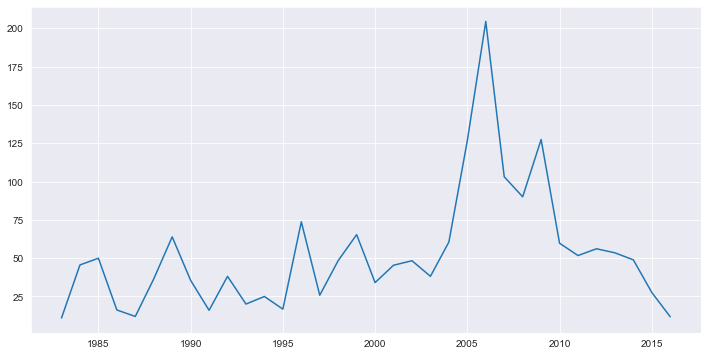

In [26]:
df_nintendo = df_clean[df_clean['Publisher'] == 'Nintendo']
df_nintendo_group = df_nintendo.groupby('Year_of_Release', as_index=False).agg({'Global_Sales':'sum'})

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(df_nintendo_group.Year_of_Release, df_nintendo_group.Global_Sales)
plt.show()

7.2 Splitting Data Train & Test


In [27]:
#splitting train and test
train=df_nintendo_group[0:29] 
test=df_nintendo_group[30:]

print('Total train data are :', len(train))
print('Total train data are :', len(test))

test.tail()

Total train data are : 29
Total train data are : 4


,Year_of_Release,Global_Sales
30,2013,53.48
31,2014,48.88
32,2015,27.61
33,2016,11.74


7.3 Visualizing Train & Test Data
- Similar with 7.1, but in this session we separate the last 4 data as test.

<function matplotlib.pyplot.show(close=None, block=None)>

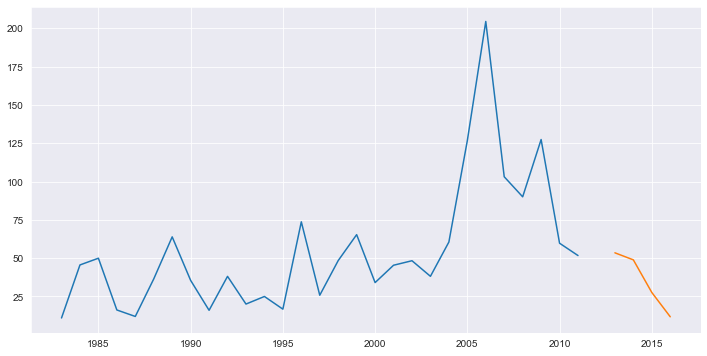

In [28]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(train.Year_of_Release, train.Global_Sales)
plt.plot(test.Year_of_Release, test.Global_Sales)
plt.show

7.4 Set the Index
- Here I set the index to respective years so we can easily query and process the data.

In [29]:
train=train.set_index('Year_of_Release')
test=test.set_index('Year_of_Release')

7.5 Deciding the Stationariness
- Here we calculate the Critical Value so we can determine which model we can use the better.
- Since it's non stationary, I decided to use Holt Linear Trend & Holl-Winters.

In [30]:
def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

check_stationarity(train['Global_Sales'])

ADF Statistic: -2.734212
p-value: 0.068303
Critical Values:
	1%: -3.689
	5%: -2.972
	10%: -2.625
Non-stationary


7.6 Holt Linear Trend
- We can see that the predicted line in green and the actual line in orange is far apart. Which means the calculation is not good.
- The MAE and RMSE scores are also quite high. Here we need to decrease the score as much as possible since it's the coefficient of the rror.

/var/folders/_d/0tjpkpcd0wg39zfsbnkxzgt40000gp/T/ipykernel_2719/2495598701.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(np.asarray(train['Global_Sales'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)


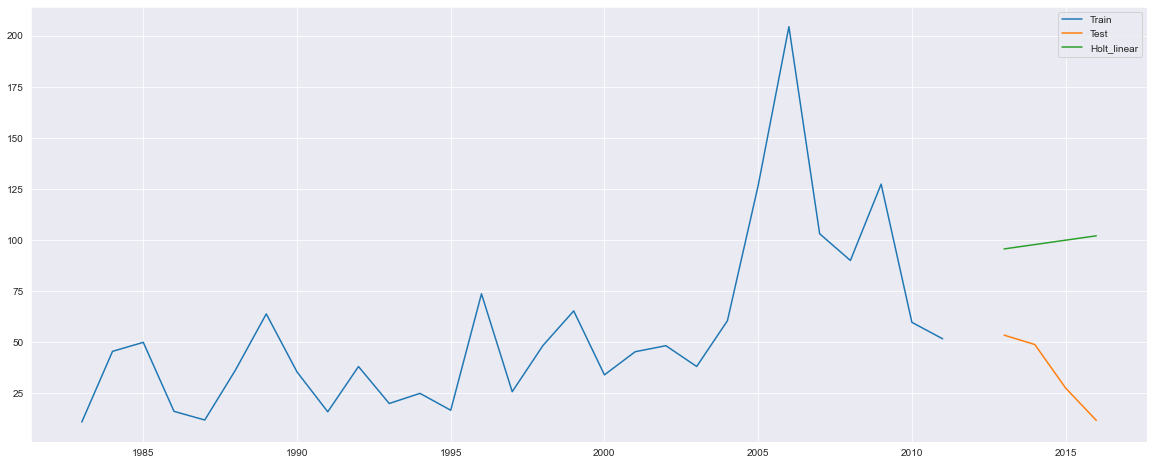

MAE : 63.45237246601056
RMSE : 66.27695632814932


In [31]:
y_hat_avg = test.copy()
fit1 = Holt(np.asarray(train['Global_Sales'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot(train['Global_Sales'], label='Train')
plt.plot(test['Global_Sales'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

print("MAE :", mean_absolute_error(test.Global_Sales, y_hat_avg.Holt_linear))
print("RMSE :", sqrt(mean_squared_error(test.Global_Sales, y_hat_avg.Holt_linear)))

7.7 Holt Winters
- The predicted values indicate the increasing in values from 2010 to 2014, then decreasing sales after that. While the actual values are decreasing over the time since 2010.
- However, if we see the MAE & RMSE it's decreasing compared to Holt Linear Trend, eventhough the predictions aren't not too accurate.

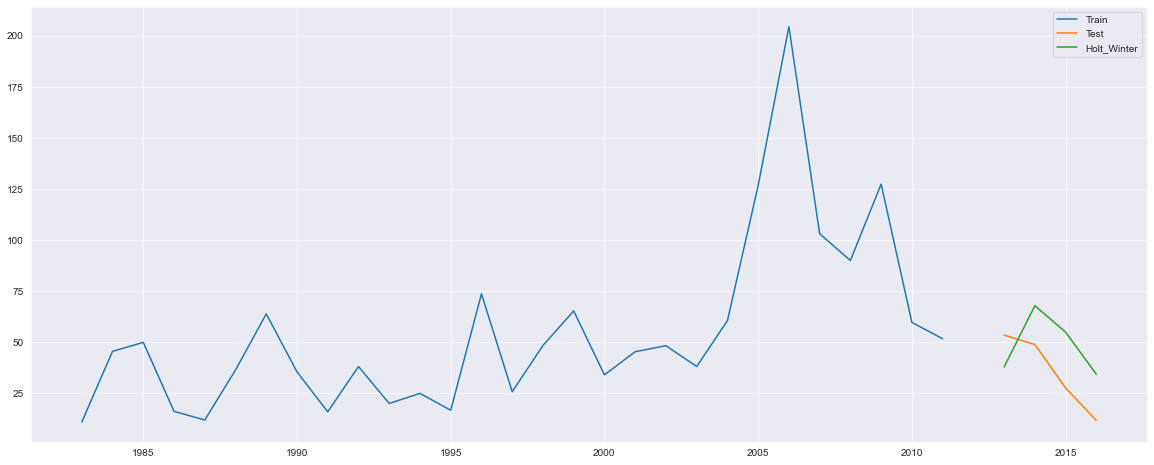

MAE : 21.136612775363627
RMSE : 21.581336383893913


In [32]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Global_Sales']) ,seasonal_periods=12 ,trend='multiplicative', seasonal='multiplicative',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot( train['Global_Sales'], label='Train')
plt.plot(test['Global_Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

print("MAE :", mean_absolute_error(test.Global_Sales, y_hat_avg.Holt_Winter))
print("RMSE :", sqrt(mean_squared_error(test.Global_Sales, y_hat_avg.Holt_Winter)))

____

## 8. CONCLUSIONS

8.1 Descriptive Analysis
- We can draw conclusion that the DS and PS2 consoles have the highest game release compared to other platforms.
- Both DS and PS2 have the same trend lines in their global sales; they have peak sales and later decreasing.
- PS2 have the peak & highest global sales in 2003 to 2004.
- DS have the peak & highest global sales in 2006 to 2007.
- The most released games genre are Action, Sports and Misc.
- The least released games genre are Simulation, Puzzle, Strategy.

8.2 Prescriptive Analysis
- The DS and PS2 declining because the release of their next generation console game. This is a normal thing, since all the console game always come with generation and type.
- Action, Sports and Misc are the most successful game in term of number of release games, since they are easy-playing. On the contracy, Simulation, Strategy and Puzzle are very segmented since more focus is needed to play such genres.
- Time Series is one way to forecast data. Here I use it to forecast the sale of the last 4 years data.
- The result may not too good. There are several reasong behing it. One, may be because the data itself. Two, time series is not am optimal way to calculate the data with external factors that can affect it.